<a href="https://colab.research.google.com/github/sswastik630/ML_Algorithms/blob/main/Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Blog](https://www.analyticsvidhya.com/blog/2021/02/a-beginners-guide-to-seaborn-the-simplest-way-to-learn/
)


In [35]:
# Pokemon Dataset
!wget https://www2.cs.arizona.edu/classes/cs120/fall17/ASSIGNMENTS/assg02/Pokemon.csv

--2021-06-21 11:26:00--  https://www2.cs.arizona.edu/classes/cs120/fall17/ASSIGNMENTS/assg02/Pokemon.csv
Resolving www2.cs.arizona.edu (www2.cs.arizona.edu)... 192.12.69.4
Connecting to www2.cs.arizona.edu (www2.cs.arizona.edu)|192.12.69.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44026 (43K) [text/csv]
Saving to: ‘Pokemon.csv.1’

Pokemon.csv.1       100%[===================>]  42.99K  --.-KB/s    in 0.1s    

2021-06-21 11:26:01 (366 KB/s) - ‘Pokemon.csv.1’ saved [44026/44026]



In [36]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df=pd.read_csv('Pokemon.csv')

In [38]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [39]:
#Column Description
# ID for each pokemon
# Name: Name of each pokemon
# Type 1: Each pokemon has a type, this determines weakness/resistance to attacks
# Type 2: Some pokemon are dual type and have 2
# Total: sum of all stats that come after this, a general guide to how strong a pokemon is
# HP: hit points, or health, defines how much damage a pokemon can withstand before fainting
# Attack: the base modifier for normal attacks (eg. Scratch, Punch)
# Defense: the base damage resistance against normal attacks
# SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
# SP Def: the base damage resistance against special attacks
# Speed: determines which pokemon attacks first each round
# Stage : Number of Generation
#Legendary : True if Legendary Pokemon , False if not

In [40]:
df.shape

(800, 13)

In [41]:
df.rename(columns = {'#':'No.',
                       "Type 1":'Pokemon_Type',
                       "Type 2":"PokemonType2",
                       'Total':'Sum of Attack',
                       "HP":"Hit Points",
                       'Attack' : 'Attack Strength',
                       'Defense':'Defensive Strength',
                       'Sp. Atk':'Special Attack Stenth',
                       'Sp. Def':'Special Defense Strength',
                       'Stage':'Generation'},
             inplace = True)

In [42]:
df.head()

,No.,Name,Pokemon_Type,PokemonType2,Sum of Attack,Hit Points,Attack Strength,Defensive Strength,Special Attack Stenth,Special Defense Strength,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Distribution Plots:
A distribution plot displays a distribution and range of a set of numeric values plotted against a dimension.  **Histograms allow you to plot the distributions of numeric variables.**

In [43]:
#df.hist(figsize=(20,10),bins=20)  # All columns are not numeric so it gives error

<Figure size 288x216 with 0 Axes>

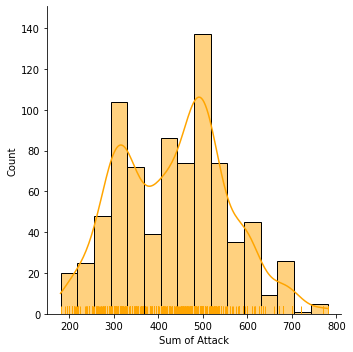

In [44]:
plt.figure(figsize=(4,3))
sns.displot(x=df['Sum of Attack'],color='Orange',kde=True,rug=True);
plt.show()

# df.hist(['Sum of Attack'])   Same using matplotlib
# sns.histplot(x=data[“Sum of Attack”],color=”Green”);



1.   For discrete variables, a **seaborn.countplot** is more convenient.
2. For continuous variables : **pyplot.hist or seaborn.distplot** are used.



# Joint Distribution Plots:
Joint distribution plots combine information from scatter plots and histograms to give us detailed information for bivariate distributions.

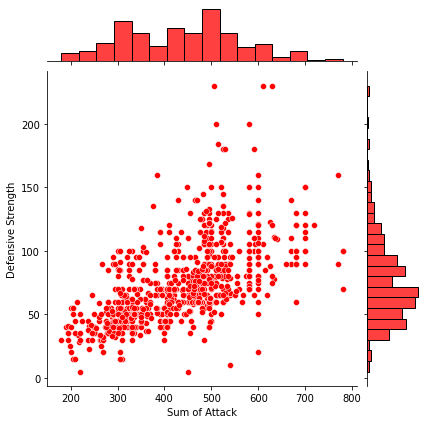

In [45]:
sns.jointplot(x=df['Sum of Attack'],y= df['Defensive Strength'],color='red')

# Density Plots:
Density plots display the distribution between two variables.

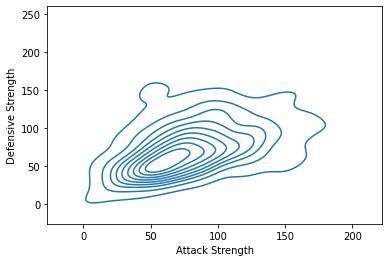

In [46]:
sns.kdeplot(x=df['Attack Strength'], y=df['Defensive Strength'])

# Bar Plot
Bar plots help us visualize the distributions of categorical variables: Countplot is a type of barplot.

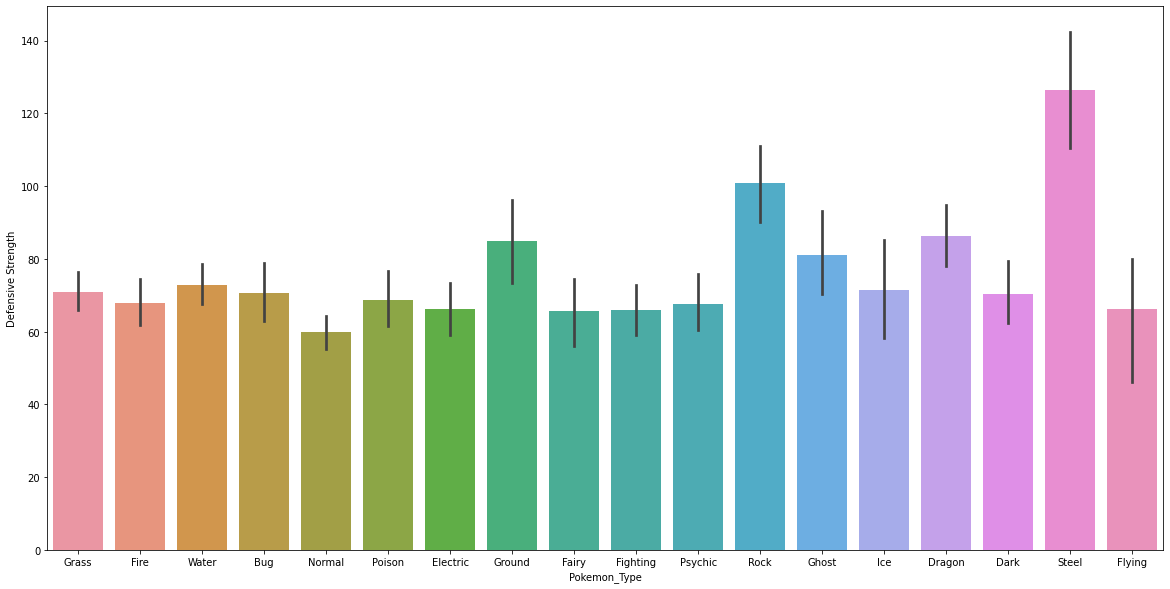

In [47]:
plt.figure(figsize=(20,10))
sns.barplot(x=df['Pokemon_Type'], y=df['Defensive Strength'])

# Count Plot

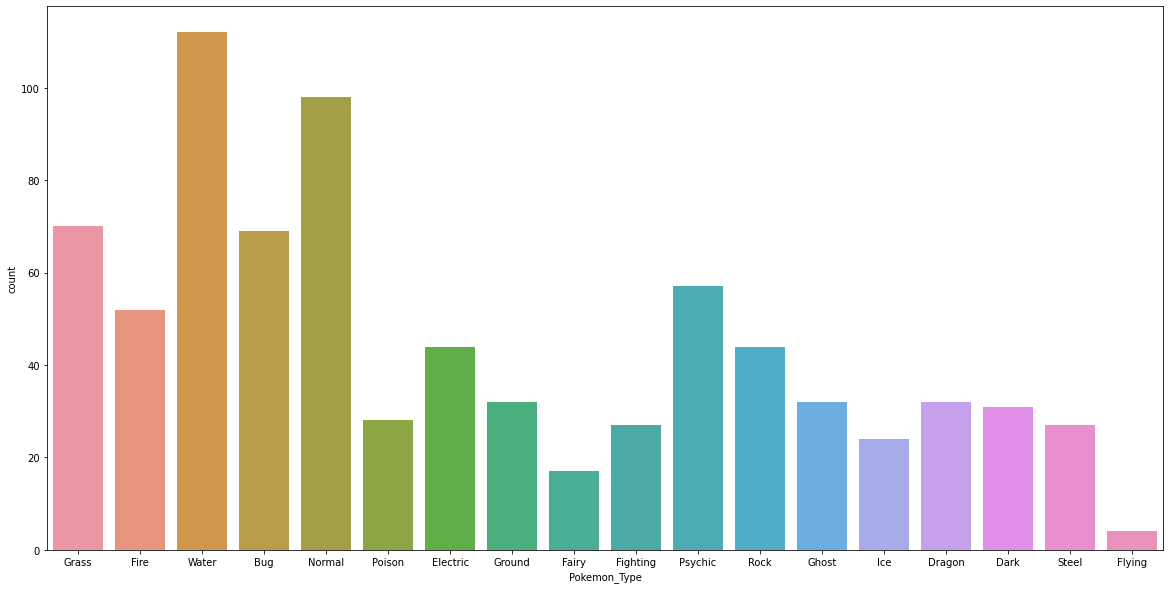

In [48]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['Pokemon_Type'])

# Heatmap
Heatmap helps us visualize matrix-like data in the form of hot and cold spots. The warm colors indicated sections with the most visitor interaction.

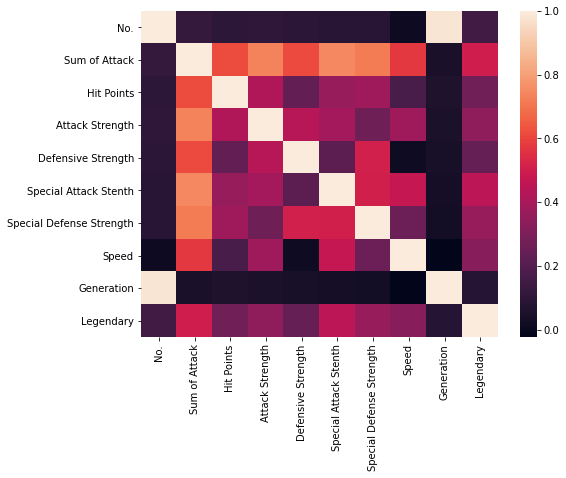

In [49]:
plt.figure(figsize=(8,6))

sns.heatmap(df.corr())

# Scatter Plot:
A scatter plot (aka scatter chart, scatter graph) uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point.

Scatter plots are used to observe relationships between variables.
Seaborn doesn’t have a dedicated scatter plot function,
Thankfully, seaborn helps us in tweaking the plot :

fit_reg=False is used to remove the regression line
hue=’Stage’ is used to color points by a third variable value. Thus, allowing us to express the third dimension of information using color.

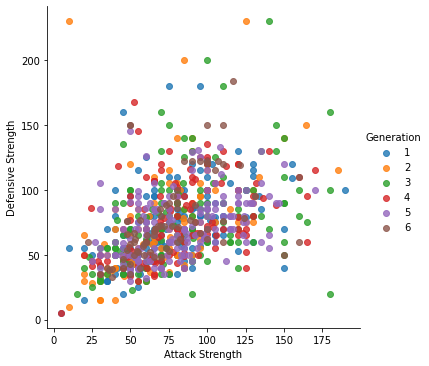

In [50]:
sns.lmplot(x='Attack Strength', y='Defensive Strength', data=df,
fit_reg = False, #Deleting regression line
 hue='Generation'); #Separating as per pokemon generation

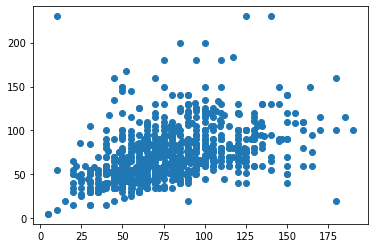

In [51]:
plt.scatter(df['Attack Strength'],df['Defensive Strength'])  #Matplot lib

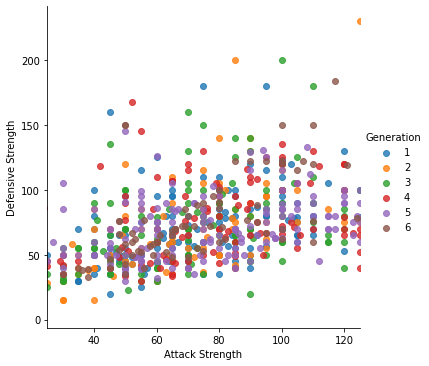

In [52]:
sns.lmplot(x='Attack Strength', y='Defensive Strength', data=df,
fit_reg = False, #Deleting regression line
hue='Generation'); #Separating as per pokemon generationplt.ylim(20,130);
plt.xlim(25,125);

# Boxplot
A box plot is used for depicting groups of numerical data through their quartiles.

Box plots may also have lines extending from the boxes indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram

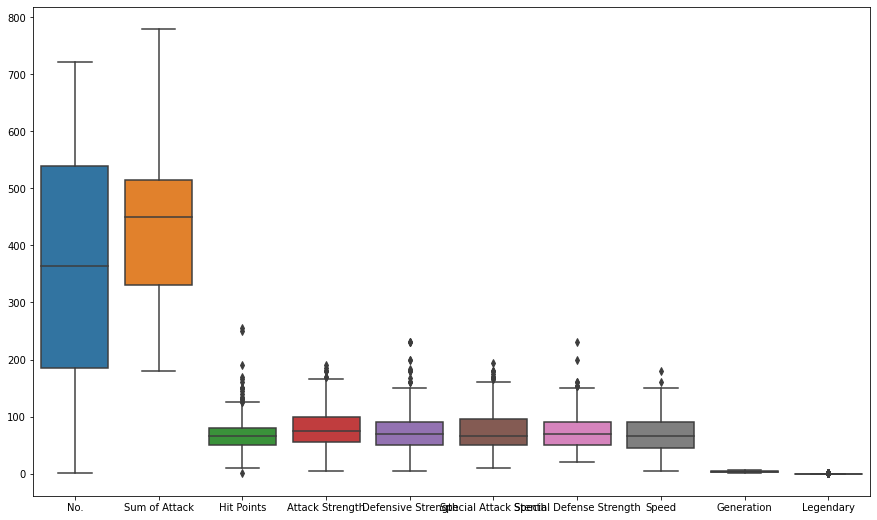

In [53]:
plt.figure(figsize=(15,9))
sns.boxplot(data=df)

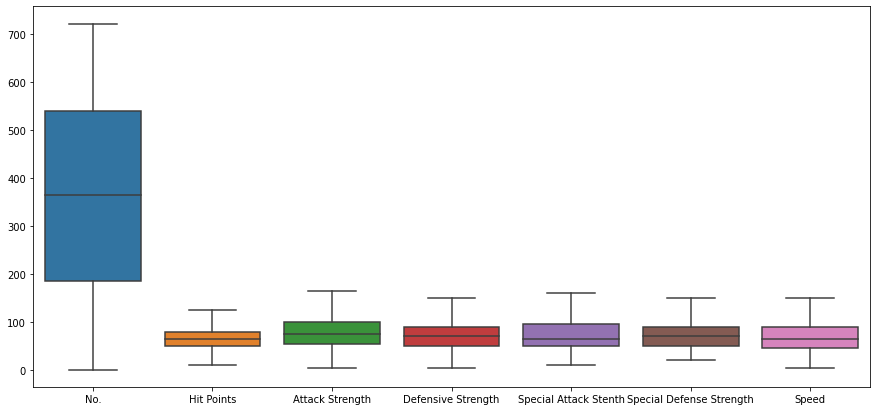

In [34]:
plt.figure(figsize=(15,7));# Pre-format DataFrame
stats_data = df.drop(['Sum of Attack', 'Generation', 'Legendary'], axis=1);
 
# New boxplot using stats_df
sns.boxplot(data=stats_data,
 showfliers=False); #Removing outlierssns.set_style(“whitegrid”)

# Violin Plots

Violin Plots are alternatives to box plots. They show the distribution (through the thickness of the violin) instead of only the summary statistics.

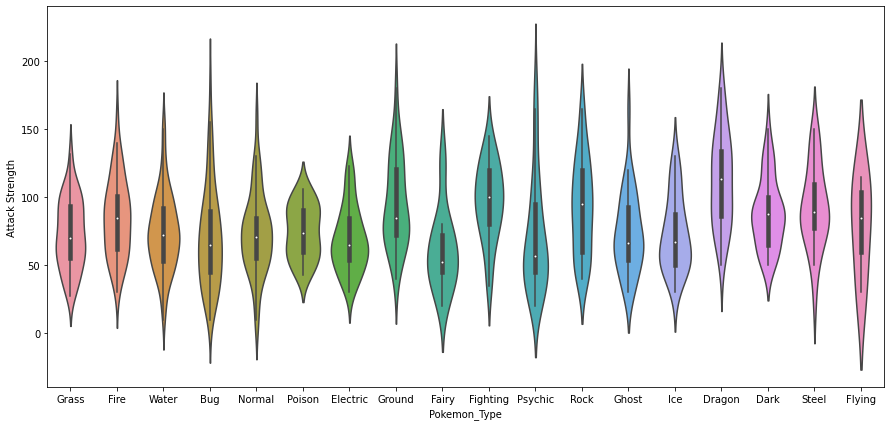

In [56]:
plt.figure(figsize=(15,7))
sns.violinplot(x=df['Pokemon_Type'], y=df['Attack Strength'])